### 1. Import libraries and data

### This script contains the following:
#### 1. Import libraries and data
#### 2. Data cleaning
#### 3. Visualizing variables for potential analysis
#### 4. Regression analysis
    4.1 Regression Analysis on hypothesis
    4.2 Regression Analysis on 

In [76]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [78]:
# Import data
path = r'/Users/nhungphamthi/Documents/data analytis/Achievement 6'
df_gun_violence = pd.read_csv(os.path.join(path, 'cleaned_gunviolence.csv'), index_col = False)

### 2. Check and clean data if necessary 

In [49]:
df_gun_violence.columns

Index(['Unnamed: 0', 'incident_id', 'date', 'state', 'n_killed', 'n_injured',
       'n_guns_involved', 'n_victims', 'n_suspects', 'n_unharmed',
       'n_arrested'],
      dtype='object')

In [51]:
df_gun_violence.shape

(239677, 11)

In [53]:
df_gun_violence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       239677 non-null  int64  
 1   incident_id      239677 non-null  int64  
 2   date             239677 non-null  object 
 3   state            239677 non-null  object 
 4   n_killed         239677 non-null  int64  
 5   n_injured        239677 non-null  int64  
 6   n_guns_involved  239677 non-null  float64
 7   n_victims        239677 non-null  int64  
 8   n_suspects       239677 non-null  int64  
 9   n_unharmed       239677 non-null  int64  
 10  n_arrested       239677 non-null  int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 20.1+ MB


In [11]:
df_gun_violence_astype = df_gun_violence.astype({
    'n_killed': 'float64',
    'n_injured': 'float64',
    'n_victims': 'float64',
    'n_suspects': 'float64',
    'n_unharmed': 'float64',
    'n_arrested': 'float64',
})
print(df_gun_violence_astype.dtypes)

Unnamed: 0           int64
incident_id          int64
date                object
state               object
n_killed           float64
n_injured          float64
n_guns_involved    float64
n_victims          float64
n_suspects         float64
n_unharmed         float64
n_arrested         float64
dtype: object


In [57]:
# define a function called "plot_boxplot"
def plot_boxplot(df, ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

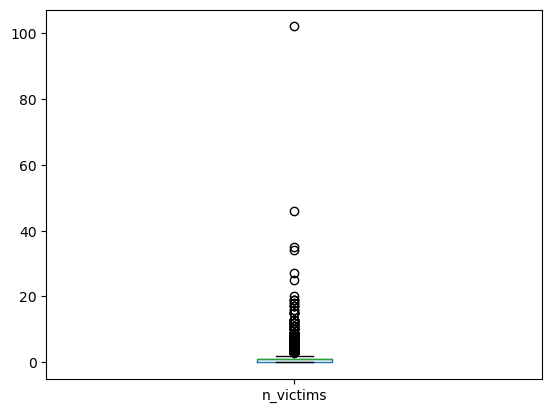

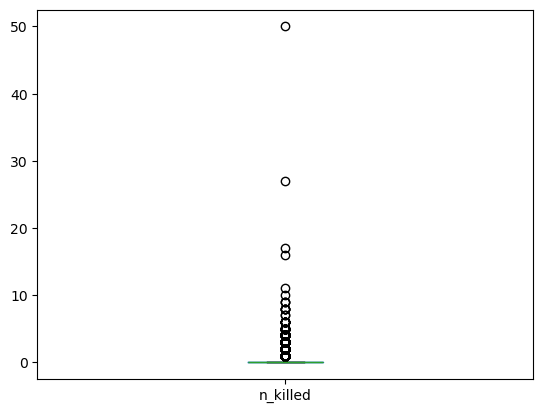

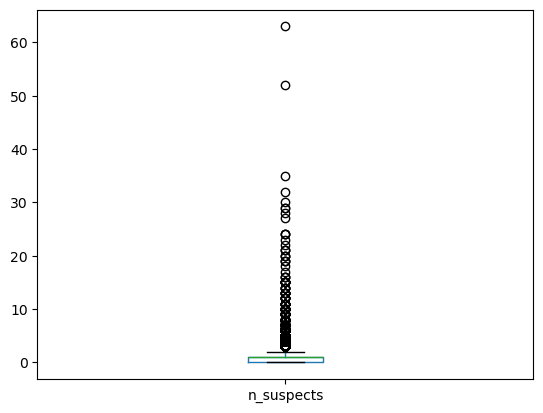

In [59]:
# check outliers values. I check some variables. 
plot_boxplot(df_gun_violence, 'n_victims')
plot_boxplot(df_gun_violence, 'n_killed')
plot_boxplot(df_gun_violence, 'n_suspects')

### 3. Visualizing variables for potential analysis

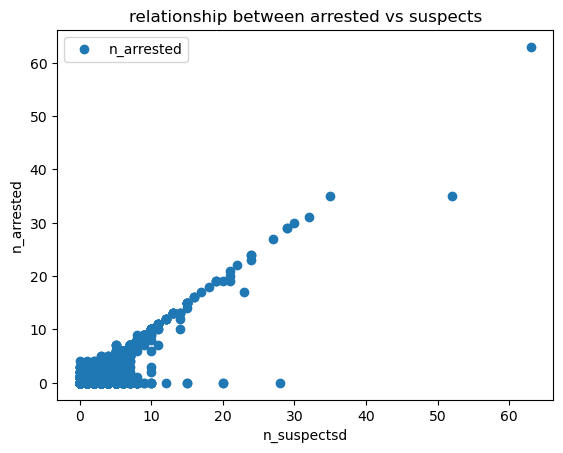

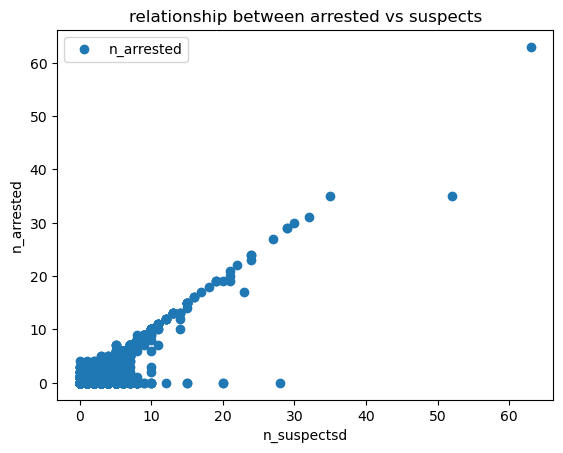

In [61]:
# Scatterplot of variables to analyze between arrest and subspects
df_gun_violence.plot(x = 'n_suspects', y = 'n_arrested', style = 'o')
plt.title('relationship between arrested vs suspects')
plt.xlabel('n_suspectsd')
plt.ylabel('n_arrested')
plt.show()

# Scatterplot of variables to analyze after astye
df_gun_violence_astype.plot(x = 'n_suspects', y = 'n_arrested', style = 'o')
plt.title('relationship between arrested vs suspects')
plt.xlabel('n_suspectsd')
plt.ylabel('n_arrested')
plt.show()

Hypothesis: the more suspects is, the more arrested is.

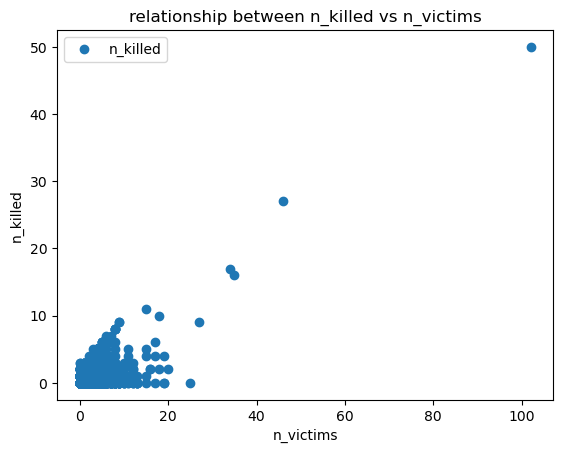

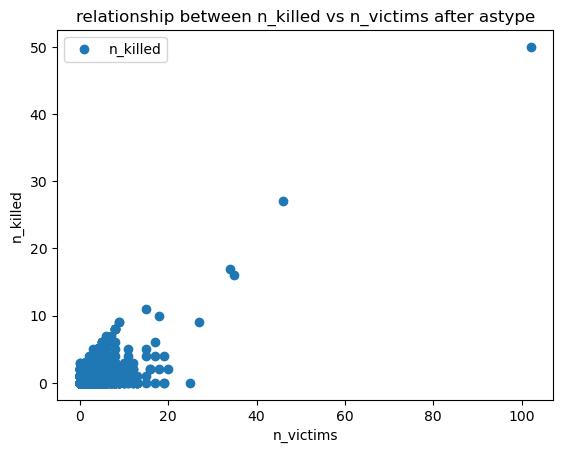

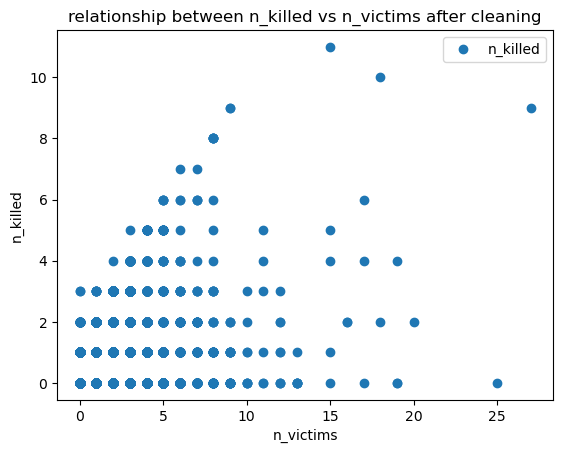

In [13]:
# Scatterplot of variables to analyze n_killed and n-victims

df_gun_violence.plot(x = 'n_victims', y = 'n_killed', style = 'o')
plt.title('relationship between n_killed vs n_victims')
plt.xlabel('n_victims')
plt.ylabel('n_killed')
plt.show()

# Scatterplot of variables to analyze after astye
df_gun_violence_astype.plot(x = 'n_victims', y = 'n_killed', style = 'o')
plt.title('relationship between n_killed vs n_victims after astype')
plt.xlabel('n_victims')
plt.ylabel('n_killed')
plt.show()


# clean outliers 
df_clean_victims= df_gun_violence[df_gun_violence['n_victims'] < 30]

# Scatterplot of variables to analyze after cleaning
df_clean_victims.plot(x = 'n_victims', y = 'n_killed', style = 'o')
plt.title('relationship between n_killed vs n_victims after cleaning')
plt.xlabel('n_victims')
plt.ylabel('n_killed')
plt.show()

### 4. Regression analysis

#### 4.1 hypothesis: If number of victims is higher than 5, the number of killed sharply increased.

In [43]:
# Split the data into subsets for skilled
subset_small = df_gun_violence[df_gun_violence['n_victims'] < 5]
subset_large = df_gun_violence[df_gun_violence['n_victims'] >= 5]

In [45]:
## Convert the variables into arrays

# For victims < 5
X_small = subset_small[['n_victims']].values.reshape(-1,1)
y_small = subset_small['n_killed'].values.reshape(-1,1)

# For victims >=5
X_large = subset_large[['n_victims']].values.reshape(-1,1)
y_large = subset_large['n_killed'].values.reshape(-1,1)


In [47]:
# Split the data into training and test sets

# For victims <5
X_small_train, X_small_test, y_small_train, y_small_test = train_test_split(X_small, y_small, test_size = 0.2, random_state=42)

# For victims >=5
X_large_train, X_large_test, y_large_train, y_large_test = train_test_split(X_large, y_large, test_size = 0.2, random_state=42)

In [49]:
# Create regression object
regression_small = LinearRegression()
regression_large = LinearRegression()

In [53]:
# Fit the models to the training data
regression_small.fit(X_small_train, y_small_train)
regression_large.fit(X_large_train, y_large_train)

LinearRegression()

In [55]:
# Make predictions
y_small_predicted = regression_small.predict(X_small_test)
y_large_predicted = regression_large.predict(X_large_test)

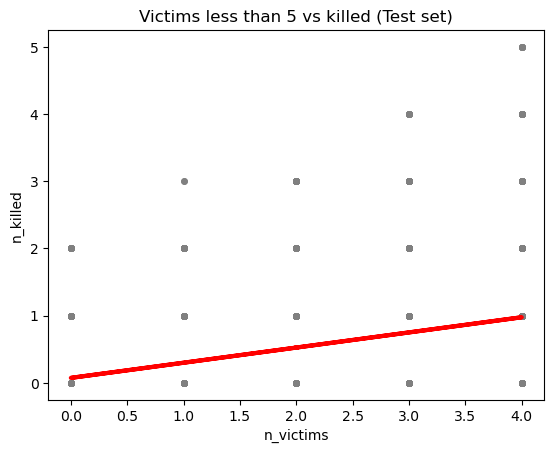

In [31]:
# Create a scatterplot to show the regression line for the 'small subset' (victims < 10)

plot_small_test = plt
plot_small_test.scatter(X_small_test, y_small_test, color = 'grey', s=15)
plot_small_test.plot(X_small_test, y_small_predicted, color = 'red', linewidth=3)
plot_small_test.title('Victims less than 5 vs killed (Test set)')
plot_small_test.xlabel('n_victims')
plot_small_test.ylabel('n_killed')
plot_small_test.show()

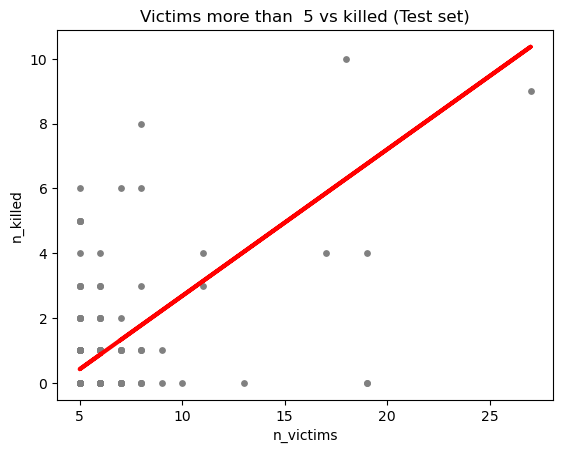

In [57]:
# Create a scatterplot to show the regression line for the 'small subset' (victims >= 10)

plot_small_test = plt
plot_small_test.scatter(X_large_test, y_large_test, color = 'grey', s=15)
plot_small_test.plot(X_large_test, y_large_predicted, color = 'red', linewidth=3)
plot_small_test.title('Victims more than  5 vs killed (Test set)')
plot_small_test.xlabel('n_victims')
plot_small_test.ylabel('n_killed')
plot_small_test.show()

**Insights:** 
- The scatter plots clearly show that the slope for the number of victims greater than 5 is steeper than that for the number of victims less than 5. But it also show that this hypothesis is not always corrected.

In [59]:
# Pull model summary statistics for victims < 5
mse_small = mean_squared_error(y_small_test, y_small_predicted) # This is the mean squared error
rmse_small = np.sqrt(mse_small) # This is the root square mean (same units as the dependent variable 'price')
r2_small = r2_score(y_small_test, y_small_predicted)

# Print summary stats
print('Model Summary Statistics for victim <5')
print('Slope:', regression_small.coef_)
print('Root mean squared error:', rmse_small)
print('R2 score:', r2_small)

Model Summary Statistics for victim <5
Slope: [[0.22559242]]
Root mean squared error: 0.47106554706410075
R2 score: 0.10421934839546931


In [61]:
# Pull model summary statistics for victims >=5
mse_large = mean_squared_error(y_large_test, y_large_predicted)
rmse_large = np.sqrt(mse_large)
r2_large = r2_score(y_large_test, y_large_predicted)

# Print summary stats
print('Model Summary Statistics for victim >=5')
print('Slope:', regression_large.coef_)
print('Root mean squared error:', rmse_large)
print('R2 score:', r2_large)

Model Summary Statistics for victim >=5
Slope: [[0.45237775]]
Root mean squared error: 1.73796466223601
R2 score: 0.037137605981970134


In [63]:
# Manual check for victime < 5
data_small = pd.DataFrame({'Actual': y_small_test.flatten(), 'Predicted': y_small_predicted.flatten()})
data_small.head(25)

,Actual,Predicted
0,0,0.523927
1,0,0.298334
2,0,0.298334
3,1,0.298334
4,0,0.298334
5,0,0.298334
6,0,0.523927
7,0,0.298334
8,1,0.523927
9,0,0.298334


In [65]:
# Manual check for victims >= 5
data_large = pd.DataFrame({'Actual': y_large_test.flatten(), 'Predicted': y_large_predicted.flatten()})
data_large.head(25)

,Actual,Predicted
0,1,0.871733
1,1,0.419355
2,0,1.324111
3,0,0.419355
4,0,2.228866
5,3,0.419355
6,1,0.419355
7,0,0.871733
8,0,1.776488
9,0,0.419355



**Insights:**

- Weak correlation: The regression line shows that the number of victims has a very limited effect on the number of people killed when victims < 5.
- High variability: The spread of grey dots suggests that factors other than the number of victims may be influencing the number of people killed.
- Ineffective model: The low R² score suggests that this model does not do a good job of explaining the outcome and may need more variables for better prediction.
 
- **For victims >=5 :**
- The model shows a positive correlation between the number of victims and the number of people killed, but the relationship is not very strong due to significant variability in the data.
- Some cases do not follow the trend, meaning other factors beyond the number of victims may influence the number of people killed.
- Further improvements (such as adding more predictor variables) may help improve the model's accuracy.

#### 4.2 Regression Analysis on victims of all case vs killed

In [100]:
# Runing Polynomial Regression
# Convert the variables into arrays

X = df_clean_victims[['n_victims']]
y = df_clean_victims['n_killed']

Polynomial Regression -> RMSE: 0.47833963639121924  R²: 0.10910645299227029
Decision Tree Regression -> RMSE: 0.4787622847680495  R²: 0.10753141705120162


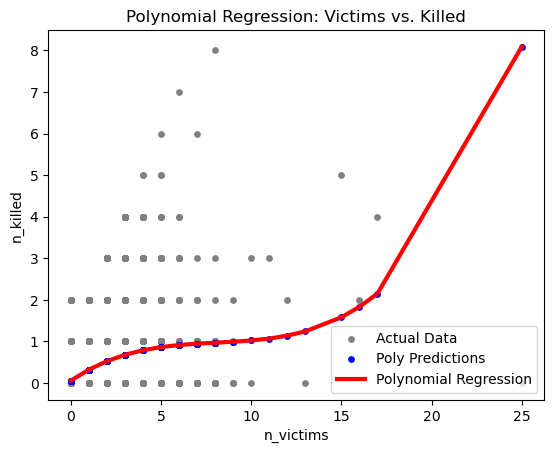

In [71]:
# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Polynomial Regression ---
# Transforming features to include polynomial terms
poly = PolynomialFeatures(degree=3) 
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predictions using polynomial regression
y_poly_pred = poly_model.predict(X_test_poly)

# Evaluate polynomial model
poly_rmse = np.sqrt(mean_squared_error(y_test, y_poly_pred))
poly_r2 = r2_score(y_test, y_poly_pred)

# --- Decision Tree Regressor ---
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

# Predictions using Decision Tree
y_tree_pred = tree_model.predict(X_test)

# Evaluate Decision Tree model
tree_rmse = np.sqrt(mean_squared_error(y_test, y_tree_pred))
tree_r2 = r2_score(y_test, y_tree_pred)

# Print model performance
print("Polynomial Regression -> RMSE:", poly_rmse, " R²:", poly_r2)
print("Decision Tree Regression -> RMSE:", tree_rmse, " R²:", tree_r2)

# --- Plot the Polynomial Regression results ---
plt.scatter(X_test, y_test, color='grey', label="Actual Data", s=15)
plt.scatter(X_test, y_poly_pred, color='blue', label="Poly Predictions", s=15)
plt.plot(np.sort(X_test.values, axis=0), np.sort(y_poly_pred, axis=0), color='red', linewidth=3, label="Polynomial Regression")
plt.xlabel("n_victims")
plt.ylabel("n_killed")
plt.title("Polynomial Regression: Victims vs. Killed")
plt.legend()
plt.show()

/Library/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Polynomial Regression -> RMSE: 0.4789688683913091  R²: 0.10676105908178246
Decision Tree Regression -> RMSE: 0.4789688683913091  R²: 0.10676105908178246
Random Forest Regression -> RMSE: 0.4781383216624959  R²: 0.109856180751977


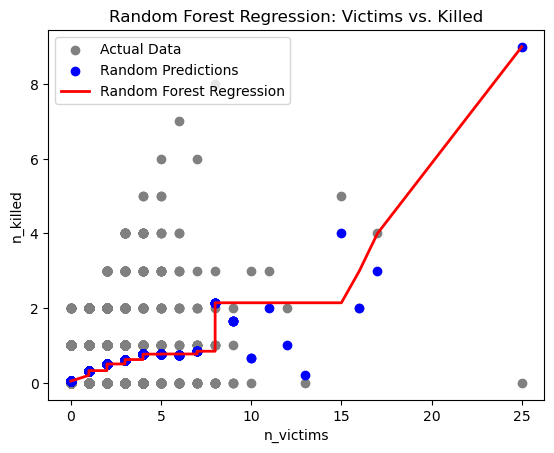

In [92]:
# Runing Random Forest Regression
# Convert the variables into arrays
X = df_clean_victims[['n_victims']]
y = df_clean_victims['n_killed']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

poly_regressor = DecisionTreeRegressor()
poly_regressor.fit(X_poly_train, y_train)
y_poly_pred = poly_regressor.predict(X_poly_test)

# Decision Tree Regression
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)
y_dt_pred = dt_regressor.predict(X_test)

# Random Forest Regression
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
y_rf_pred = rf_regressor.predict(X_test)

# Evaluation
rmse_poly = mean_squared_error(y_test, y_poly_pred, squared=False)
r2_poly = r2_score(y_test, y_poly_pred)

rmse_dt = mean_squared_error(y_test, y_dt_pred, squared=False)
r2_dt = r2_score(y_test, y_dt_pred)

rmse_rf = mean_squared_error(y_test, y_rf_pred, squared=False)
r2_rf = r2_score(y_test, y_rf_pred)

print(f"Polynomial Regression -> RMSE: {rmse_poly}  R²: {r2_poly}")
print(f"Decision Tree Regression -> RMSE: {rmse_dt}  R²: {r2_dt}")
print(f"Random Forest Regression -> RMSE: {rmse_rf}  R²: {r2_rf}")

# Plot Results

plt.scatter(X_test, y_test, color='grey', label="Actual Data")
plt.scatter(X_test, y_poly_pred, color='blue', label="Random Predictions")
plt.plot(np.sort(X_test.values, axis=0), np.sort(y_poly_pred, axis=0), color='red', linewidth=2, label="Random Forest Regression")
plt.xlabel("n_victims")
plt.ylabel("n_killed")
plt.title("Random Forest Regression: Victims vs. Killed")
plt.legend()
plt.show()

**Insights:**

I have tried to run two different models but the result doest show clearly  relationship. I gusst that we have to add more variable like location or type of gun violence...


# 4.3 If number of suspects is higher than 10, the number of arrested sharply increased.

The result of model below does not show clearly relationship between arrested and suspects.

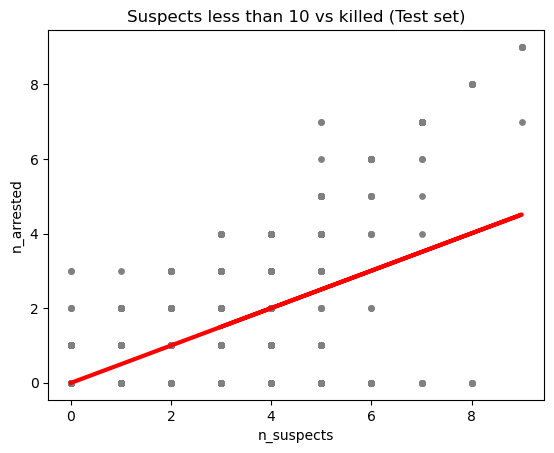

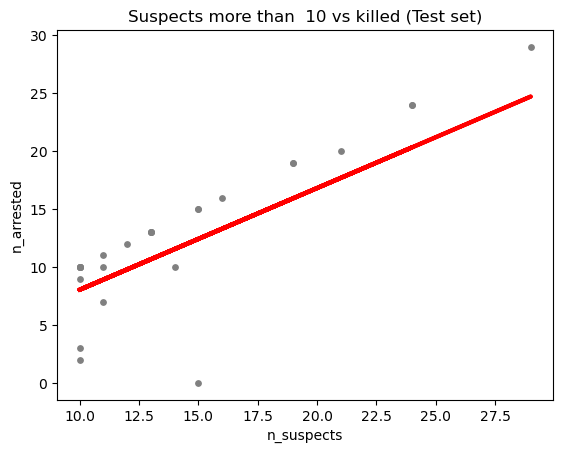

In [95]:
# Split the data into subsets for skilled
subset_small = df_gun_violence[df_gun_violence['n_suspects'] < 10]
subset_large = df_gun_violence[df_gun_violence['n_suspects'] >= 10]

## Convert the variables into arrays

# For victims < 5
X_small = subset_small[['n_suspects']].values.reshape(-1,1)
y_small = subset_small['n_arrested'].values.reshape(-1,1)

# For victims >=5
X_large = subset_large[['n_suspects']].values.reshape(-1,1)
y_large = subset_large['n_arrested'].values.reshape(-1,1)

# Split the data into training and test sets

# For victims <5
X_small_train, X_small_test, y_small_train, y_small_test = train_test_split(X_small, y_small, test_size = 0.3, random_state=40)

# For victims >=5
X_large_train, X_large_test, y_large_train, y_large_test = train_test_split(X_large, y_large, test_size = 0.3, random_state=40)

# Create regression object
regression_small = LinearRegression()
regression_large = LinearRegression()

# Fit the models to the training data
regression_small.fit(X_small_train, y_small_train)
regression_large.fit(X_large_train, y_large_train)

# Make predictions
y_small_predicted = regression_small.predict(X_small_test)
y_large_predicted = regression_large.predict(X_large_test)

# Create a scatterplot to show the regression line for the 'small subset' (victims < 10)

plot_small_test = plt
plot_small_test.scatter(X_small_test, y_small_test, color = 'grey', s=15)
plot_small_test.plot(X_small_test, y_small_predicted, color = 'red', linewidth=3)
plot_small_test.title('Suspects less than 10 vs killed (Test set)')
plot_small_test.xlabel('n_suspects')
plot_small_test.ylabel('n_arrested')
plot_small_test.show()

# Create a scatterplot to show the regression line for the 'small subset' (victims >= 10)

plot_small_test = plt
plot_small_test.scatter(X_large_test, y_large_test, color = 'grey', s=15)
plot_small_test.plot(X_large_test, y_large_predicted, color = 'red', linewidth=3)
plot_small_test.title('Suspects more than  10 vs killed (Test set)')
plot_small_test.xlabel('n_suspects')
plot_small_test.ylabel('n_arrested')
plot_small_test.show()

In [97]:
# Pull model summary statistics for suspects <10
mse_small = mean_squared_error(y_small_test, y_small_predicted) # This is the mean squared error
rmse_small = np.sqrt(mse_small) # This is the root square mean (same units as the dependent variable 'price')
r2_small = r2_score(y_small_test, y_small_predicted)

# Print summary stats
print('Model Summary Statistics for suspects <10')
print('Slope:', regression_small.coef_)
print('Root mean squared error:', rmse_small)
print('R2 score:', r2_small)

# Pull model summary statistics for suspects >= 10
mse_large = mean_squared_error(y_large_test, y_large_predicted) # This is the mean squared error
rmse_large = np.sqrt(mse_large) # This is the root square mean (same units as the dependent variable 'price')
r2_large = r2_score(y_large_test, y_large_predicted)

# Print summary stats
print('Model Summary Statistics for suspects >=10')
print('Slope:', regression_small.coef_)
print('Root mean squared error:', rmse_small)
print('R2 score:', r2_small)

Model Summary Statistics for suspects <10
Slope: [[0.50129761]]
Root mean squared error: 0.5922958941381126
R2 score: 0.36791442610362357
Model Summary Statistics for suspects >=10
Slope: [[0.50129761]]
Root mean squared error: 0.5922958941381126
R2 score: 0.36791442610362357
